Optimal Solution: Solution(parameters=[99.54568240137269, 99.13031698702028, 99.94137661060597, 99.85654292933555, 99.5626209439499])
Optimal Fitness: -498.0365398722844


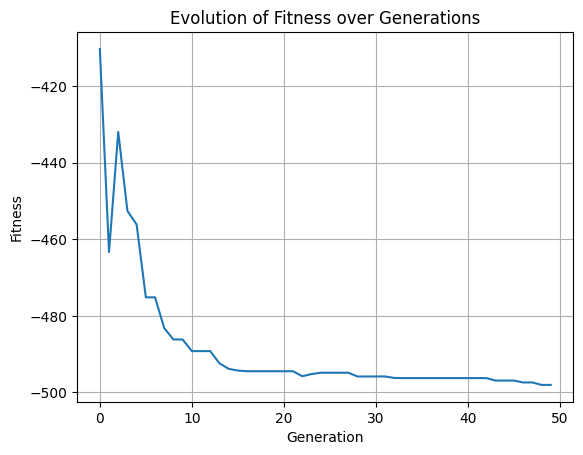

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the Solution class for a genetic algorithm approach to boiler design
class Solution:
    def __init__(self, parameters):
        self.parameters = parameters  # Design variables for boiler parameters

    def fitness(self):
        # Calculate fitness as the negative sum of parameters, simulating efficiency
        return -np.sum(self.parameters)

    def __repr__(self):
        # String representation of the solution for easy debugging
        return f"Solution(parameters={self.parameters})"

# Function to generate the initial population of solutions
def initial_population(size, dimension):
    return [Solution(np.random.uniform(0, 100, dimension)) for _ in range(size)]

# Class to encapsulate the genetic algorithm operations
class GeneticAlgorithm:
    def __init__(self, size, dimension, generations, mutation_rate):
        self.size = size
        self.dimension = dimension
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.population = initial_population(size, dimension)
        self.history = []

    def evolve(self):
        for _ in range(self.generations):
            self.population = self.next_generation()
            best = min(self.population, key=lambda x: x.fitness())
            self.history.append(best.fitness())

    def next_generation(self):
        parents = sorted(self.population, key=lambda x: x.fitness())[:len(self.population)//2]
        children = []
        while len(children) < self.size:
            p1, p2 = random.sample(parents, 2)
            child = self.crossover(p1, p2)
            self.mutate(child)
            children.append(child)
        return children

    def crossover(self, parent1, parent2):
        child_params = [random.choice([p1, p2]) for p1, p2 in zip(parent1.parameters, parent2.parameters)]
        return Solution(child_params)

    def mutate(self, solution):
        solution.parameters = [p if random.random() > self.mutation_rate else np.random.uniform(0, 100) for p in solution.parameters]

# Problem class that uses the GeneticAlgorithm to find a solution
class BoilerDesign:
    def __init__(self, dimension=5, size=100, generations=50, mutation_rate=0.05):
        self.ga = GeneticAlgorithm(size, dimension, generations, mutation_rate)

    def solve(self):
        self.ga.evolve()
        optimal = min(self.ga.population, key=lambda x: x.fitness())
        print(f"Optimal Solution: {optimal}")
        print(f"Optimal Fitness: {optimal.fitness()}")

    def show_history(self):
        plt.figure()
        plt.plot(self.ga.history)
        plt.title('Evolution of Fitness over Generations')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    problem = BoilerDesign()
    problem.solve()
    problem.show_history()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.8 MB/s eta 0:00:00
gen	nevals	avg     	std     	min      	max     
0  	50    	0.176155	0.150648	0.0352729	0.804104
1  	28    	0.0708287	0.0400187	0.0167156	0.177131
2  	28    	0.0435179	0.0307251	0.0150009	0.194403
3  	30    	0.0319658	0.0216972	0.0150009	0.164326
4  	28    	0.0214589	0.00599865	0.0118446	0.0352729
5  	33    	0.01775  	0.00434602	0.0118446	0.0387808
6  	25    	0.0170765	0.0100564 	0.0118446	0.0832305
7  	33    	0.013645 	0.0028585 	0.0117371	0.0291087
8  	30    	0.0146281	0.0131789 	0.0117371	0.103323 
9  	23    	0.0119594	0.000844226	0.0114025	0.017331 
10 	34    	0.0198892	0.0278847  	0.0114025	0.131234 
11 	25    	0.0120505	0.00174245 	0.0114025	0.0220264
12 	23    	0.0116613	0.000688444	0.0114025	0.0163399
13 	29    	0.0130856	0.00513914 	0.0114025	0.0360577
14 	25    	0.0160288	0.0323842  	0.0114025	0.242718 
15 	33    	0.0168868	0.0209436  	0.0114025	0.127065 
16 	31    	0.0191265	0.0267484  	0.011402

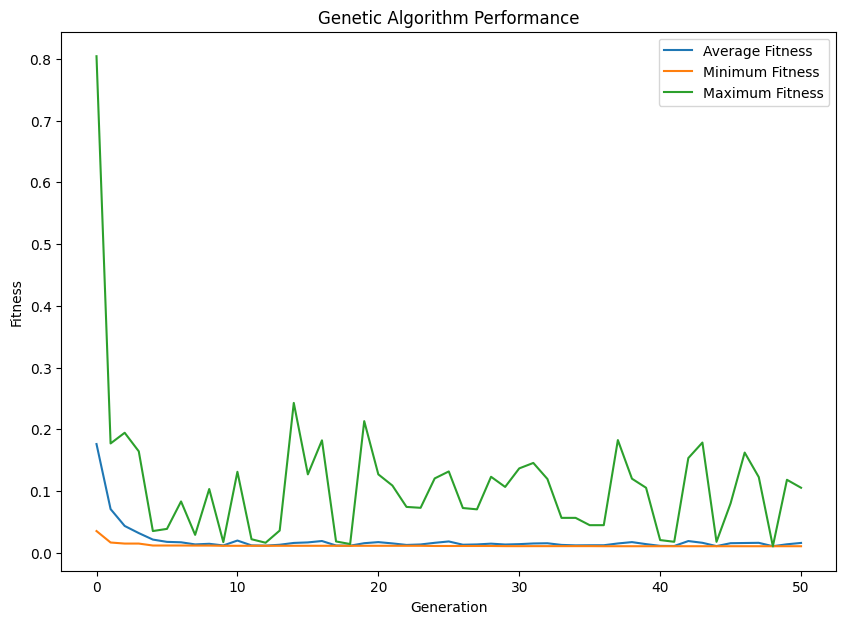

In [6]:

!pip install deap
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt
import numpy


# Problem constants:
TARGET_OUTPUT_TEMP = 150  # Target temperature in Celsius
MAX_FUEL_RATE = 10        # Maximum fuel rate in liters per hour
MAX_AIR_INTAKE = 20       # Maximum air intake in cubic meters per hour
MAX_WATER_FEED = 500      # Maximum water feed in liters per hour

# Fitness function:
def evaluate(individual):
    fuel_rate, air_intake, water_feed = individual
    efficiency = simulate_boiler(fuel_rate, air_intake, water_feed)
    fuel_consumption = fuel_rate / efficiency
    return (fuel_consumption,)

# Boiler simulation dummy function:
def simulate_boiler(fuel_rate, air_intake, water_feed):
    # Dummy simulation logic for efficiency:
    return 100 - (fuel_rate + air_intake / MAX_AIR_INTAKE * 50 + water_feed / MAX_WATER_FEED * 50)

# Genetic Algorithm setup:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_fuel", random.uniform, 1, MAX_FUEL_RATE)
toolbox.register("attr_air", random.uniform, 1, MAX_AIR_INTAKE)
toolbox.register("attr_water", random.uniform, 1, MAX_WATER_FEED)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_fuel, toolbox.attr_air, toolbox.attr_water), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", tools.mutUniformInt, low=[1, 1, 1], up=[MAX_FUEL_RATE, MAX_AIR_INTAKE, MAX_WATER_FEED], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Running the GA:
population = toolbox.population(n=50)
hall_of_fame = tools.HallOfFame(maxsize=1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

result, log = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, stats=stats, halloffame=hall_of_fame, verbose=True)

# Plotting the results
gen = log.select("gen")
avg = log.select("avg")
min_ = log.select("min")
max_ = log.select("max")

plt.figure(figsize=(10, 7))
plt.plot(gen, avg, label='Average Fitness')
plt.plot(gen, min_, label='Minimum Fitness')
plt.plot(gen, max_, label='Maximum Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Genetic Algorithm Performance')
plt.legend()
plt.show()